In [71]:
# Importing all related packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] =(12,10)

In [96]:
# import csv file and assign to kickstarter_raw
kickstarter_raw = pd.read_csv('ks-projects-201801.csv', parse_dates = [0])

In [120]:
# get information for the data set. 
print(kickstarter_raw.info())
print(kickstarter_raw.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null object
name                378657 non-null object
category            378661 non-null category
main_category       378661 non-null category
currency            378661 non-null category
deadline            378661 non-null datetime64[ns]
goal                378661 non-null float64
launched            378661 non-null datetime64[ns]
pledged             378661 non-null float64
state               378661 non-null category
backers             378661 non-null int64
country             378661 non-null category
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: category(5), datetime64[ns](2), float64(5), int64(1), object(2)
memory usage: 34.0+ MB
None
           ID                                               name  \
0  1000002330                    The Songs of 

In [119]:
#Drop duplicates
kickstarter_raw = kickstarter_raw.drop_duplicates()

In [102]:
#Convert deadline and launched from object to datetime type
kickstarter_raw['deadline']= pd.to_datetime(kickstarter_raw['deadline'])
kickstarter_raw['launched']= pd.to_datetime(kickstarter_raw['launched'])

In [117]:
#Convert category, main_category, state, country and currency to categorical type
kickstarter_raw['category'] = kickstarter_raw['category'].astype('category')
kickstarter_raw['main_category']=kickstarter_raw['main_category'].astype('category')
kickstarter_raw['state'] = kickstarter_raw['state'].astype('category')
kickstarter_raw['currency'] = kickstarter_raw['currency'].astype('category')
kickstarter_raw['country'] = kickstarter_raw['country'].astype('category')

In [32]:
# count # of project of each country
kickstarter_raw.country.value_counts(dropna=False)

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [129]:
# find out the rows with country name = N0"

kickstarter_raw.loc[kickstarter_raw['country'] == 'N,0"']

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN,1585.00,1200.00


In [130]:
# remove rows with NaN values
kickstarter_clean = kickstarter_raw.dropna()

In [131]:
# count # of project of each main_category
kickstarter_clean.main_category.value_counts(dropna=False)

Film & Video    62696
Music           49530
Publishing      39379
Games           35225
Technology      32562
Design          30066
Art             28152
Food            24599
Fashion         22812
Theater         10912
Comics          10819
Photography     10778
Crafts           8809
Journalism       4754
Dance            3767
Name: main_category, dtype: int64

In [146]:
# count # of project for each state
kickstarter_clean.state.value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
undefined          0
Name: state, dtype: int64

In [134]:
# Statistics summary of the numerical data 
kickstarter_clean.describe()

,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.748600e+05,3.748600e+05,374860.000000,3.748600e+05,3.748600e+05,3.748600e+05
mean,4.952299e+04,9.750538e+03,106.688366,7.036802e+03,9.120899e+03,4.586303e+04
std,1.189362e+06,9.601094e+04,911.710124,7.864016e+04,9.131969e+04,1.158767e+06
min,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,2.000000e+03,3.100000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,5.500000e+03,6.200000e+02,12.000000,3.947650e+02,6.244950e+02,5.500000e+03
75%,1.650000e+04,4.080000e+03,57.000000,3.034425e+03,4.050895e+03,1.600000e+04
max,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [135]:
# Count the number of None in each column 
kickstarter_clean.isna().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

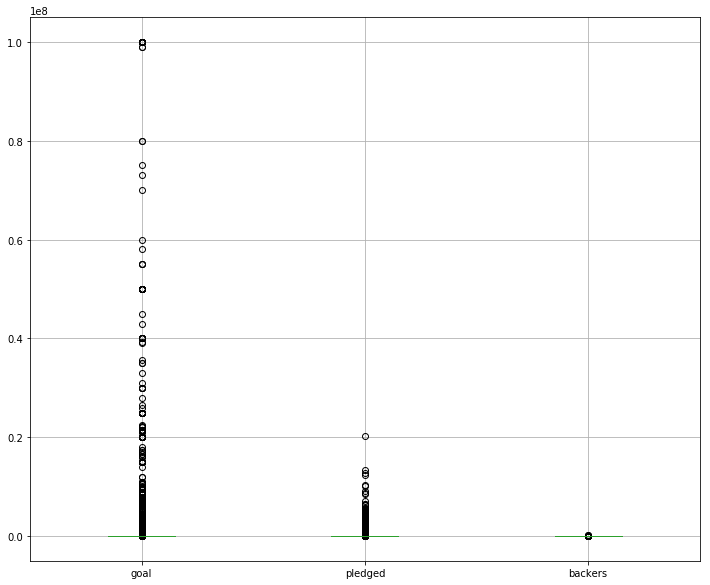

In [136]:
# Boxplot of the dataset
kickstarter_boxplot = kickstarter_clean.boxplot(column = ['goal','pledged','backers'])

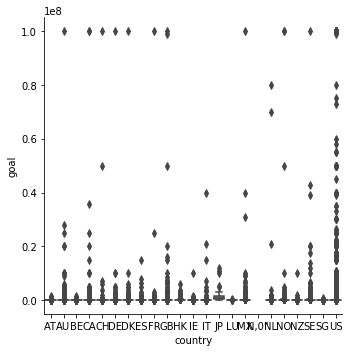

In [137]:
sns.catplot(x="country", y="goal", kind="box", data=kickstarter_clean)

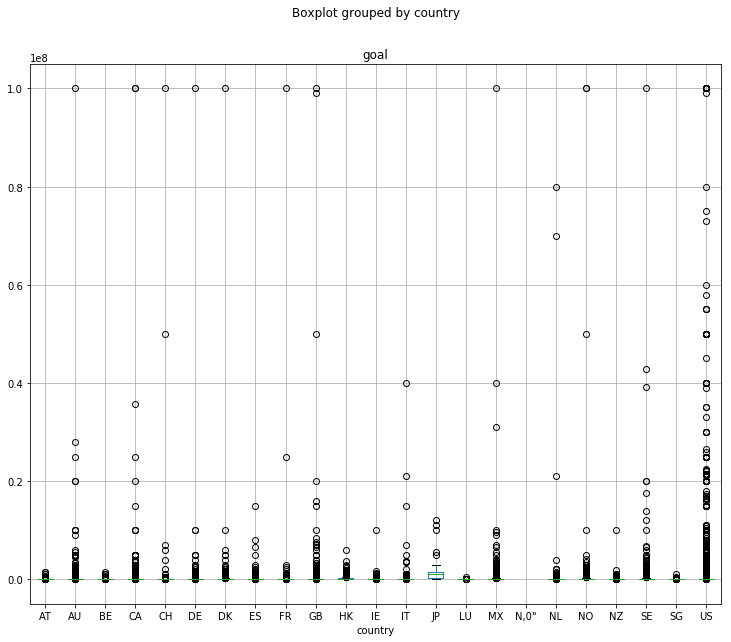

In [139]:
#boxplot of goal per country
kickstarter_clean.boxplot(column='goal', by='country')
plt.show()

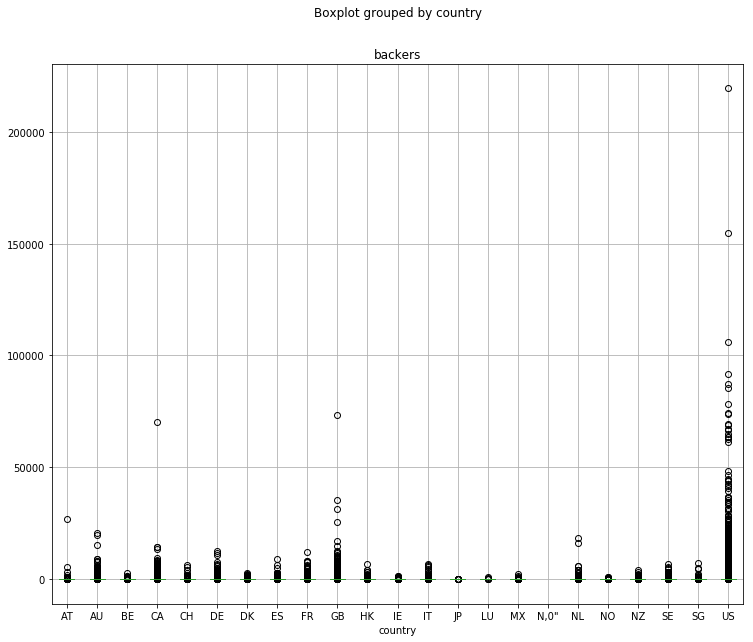

In [140]:
#boxplot of #of backers by country
kickstarter_clean.boxplot(column='backers', by='country')
plt.show()

C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


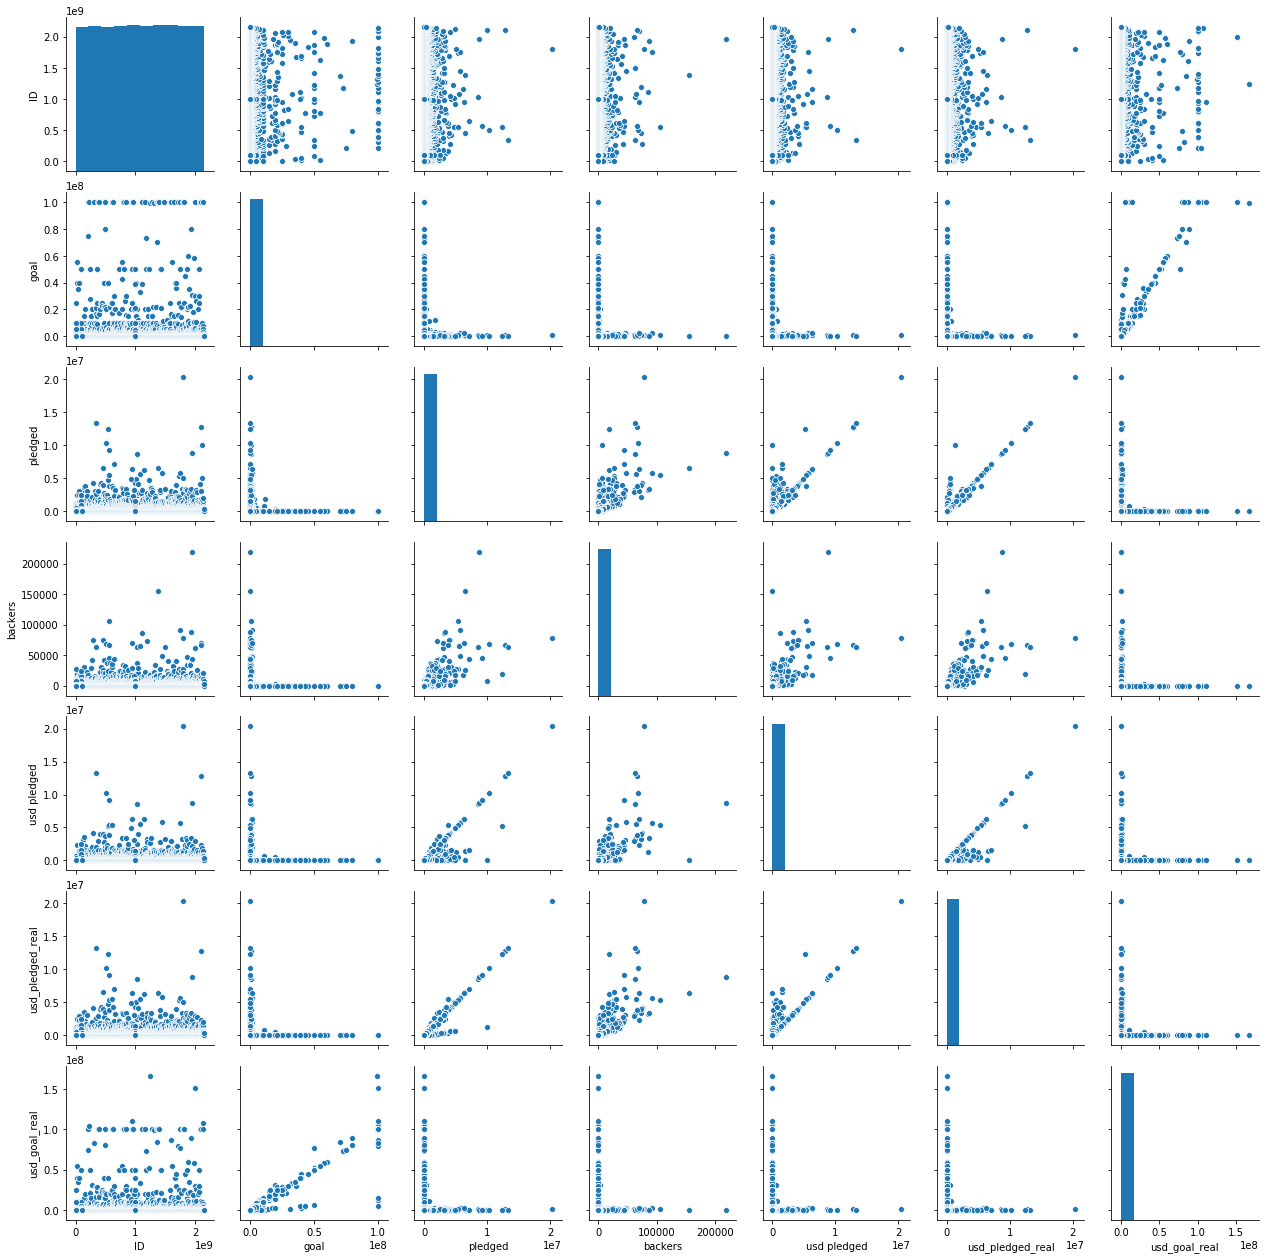

In [46]:
# Pair plot of each column
sns.pairplot(kickstarter_raw)

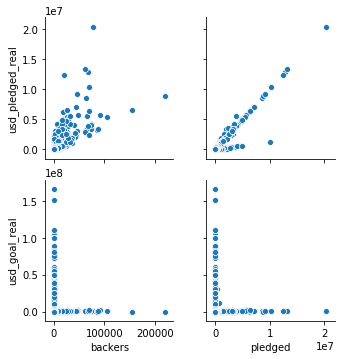

In [141]:
g = sns.pairplot(kickstarter_clean,
                  x_vars=["backers", "pledged"],
                  y_vars=["usd_pledged_real", "usd_goal_real"])

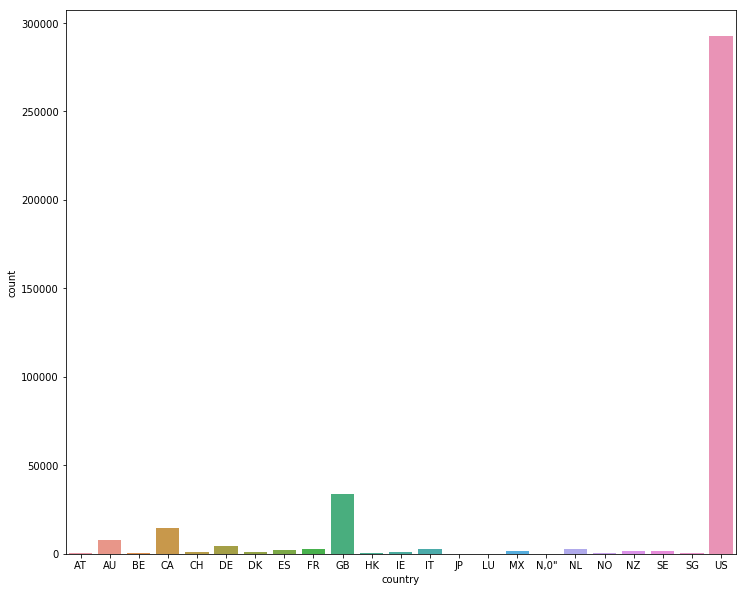

In [142]:
ab= sns.countplot(x='country',data=kickstarter_clean)
plt.show()

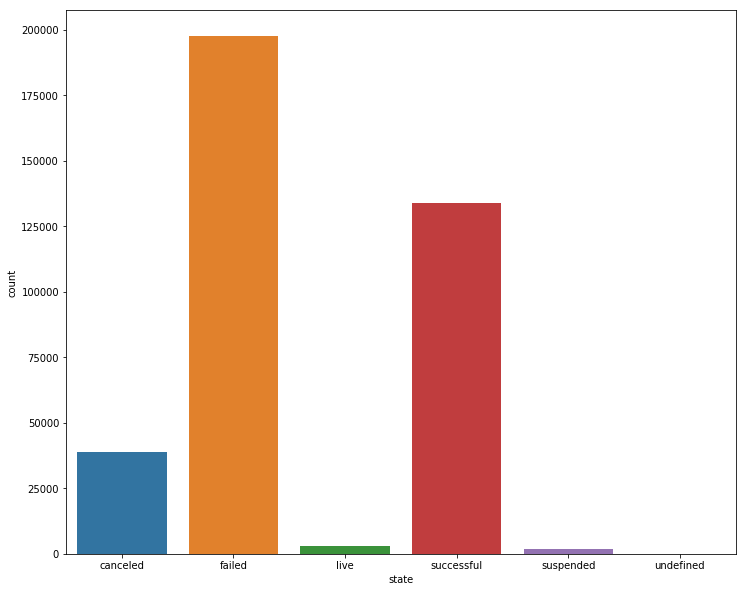

In [143]:
# Count the number of different project states
ac = sns.countplot(x='state', data = kickstarter_clean)

[(0, 800)]

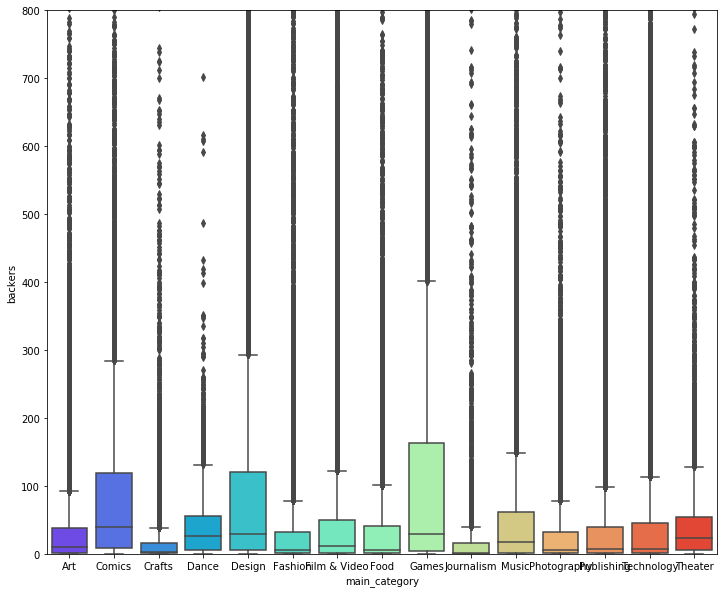

In [144]:
am= sns.boxplot(x='main_category',y='backers',data=kickstarter_clean, palette = 'rainbow')
am.set(ylim=(0,800))


[(0, 2000)]

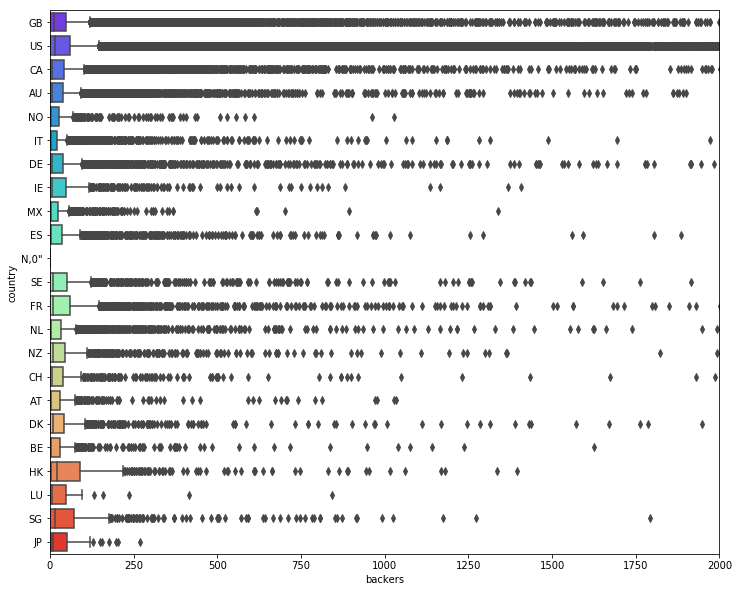

In [79]:
am= sns.boxplot(x='backers',y='country', data=kickstarter_raw, palette = 'rainbow', orient='h')
am.set(xlim=(0,2000))


C:\Users\yunin\Anaconda2\envs\Python 3.6\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[(-300, 300)]

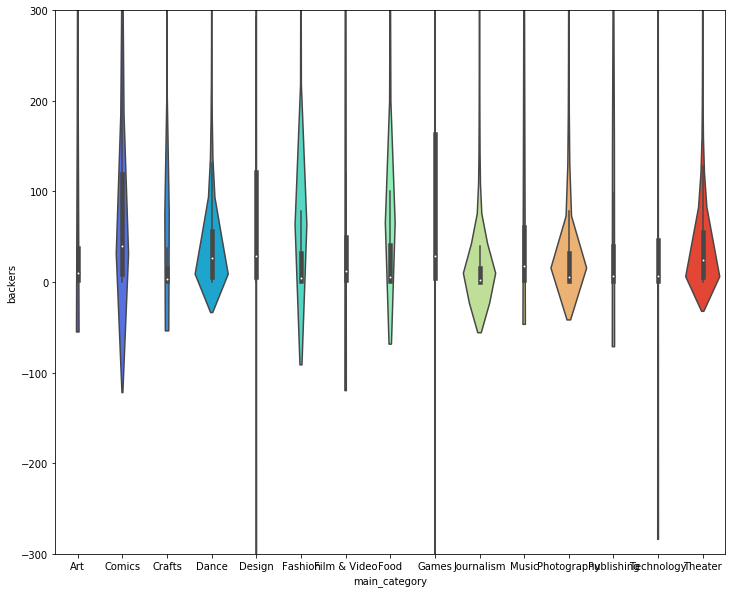

In [145]:
ak= sns.violinplot(x="main_category", y="backers", data=kickstarter_clean,palette='rainbow')
ak.set(ylim =(-300,300))

In [152]:
# check to see if anymore missing values
assert kickstarter_clean.name.notnull().all()
